# Python basics

## Fibunacci recursion exercise


Write a function `calc_fibunacci(z)` that returns the Fibunacci number for the input z. 

Here is how you calculate Fibunacci numbers:
- `Fibunacci(z) = `
> - `1, if z==0` 
> - `1, if z==1` 
> - `Fibunacci(z-2) + Fibunacci(z-1), else`  




### Recursive solution

In [2]:
def calc_fibunacci(z):
    """
    Return the <int> fibunacci number of the input <int> z
    """
    if z in (0, 1):
        return 1

    return calc_fibunacci(z-2) + calc_fibunacci(z-1)

In [9]:
import time
ct = {"recursion": []}
for i in range(30):
    t0 = time.time()
    fib = calc_fibunacci(i)
    ct["recursion"].append(time.time()-t0)

In [10]:
import matplotlib.pyplot as plt
def plot_compute_times(ct):
    for label, times in ct.items():
        plt.semilogy(times, label=label)

    plt.ylabel("compute time [s]")
    plt.grid(), plt.legend();

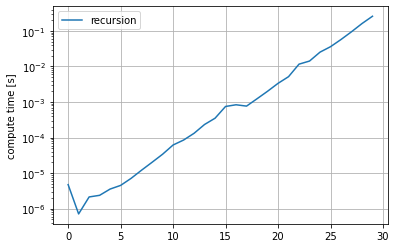

In [11]:
plot_compute_times(ct)

### Solution using `class` and `classmethod`

In [8]:
class Fibunacci_calculator:
    known_fibus = {0: 1, 1: 1}

    @classmethod
    def calc(cls, z):
        if z in cls.known_fibus.keys():
            return cls.known_fibus[z]

        cls.known_fibus[z] = cls.calc(z-2) + cls.calc(z-1)
        return cls.known_fibus[z]

In [12]:
ct["cache in class"] = []
for i in range(30):
    t0 = time.time()
    fib = Fibunacci_calculator.calc(i)
    ct["cache in class"].append(time.time()-t0)

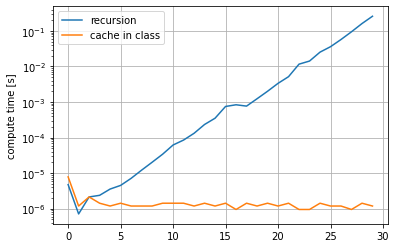

In [13]:
plot_compute_times(ct)

## Mutable vs. immutable Python objects
Immutable objects can't be changes **in place**, once they are generated.
- immutable python objects are `int`, `str`, `bool`, `tuple`,..
- mutable python objects are `list`, `dict`, `set`,..

In [ ]:
# helper function 
def print_var(var):
    print("var '{}' of type '{}' stored in memory at {}".format(var, type(var).__name__, id(var)))

In [ ]:
var = 5
print_var(var)

var '5' of type 'int' stored in memory at 10914624


In [ ]:
var += 1
print_var(var)

var '6' of type 'int' stored in memory at 10914656


The memory address is different, because a new `int` has been created an assigned to `var`.

In [ ]:
var = [1, 2]
print_var(var)

var '[1, 2]' of type 'list' stored in memory at 140584714728904


In [ ]:
var.append(3)
print_var(var)

var '[1, 2, 3]' of type 'list' stored in memory at 140584714728904


### Exercise on `==` and `is` operators
- `a == b` asks whether the value of `a` is equals the value of `b`
- `a is b` asks whether `a` is the same object as `b`


In [ ]:
string_a = "hi"
string_b = "hi"
list_a = [1,2,3]
list_b = [1,2,3]
print("string_a == string_b returns '?'")
print("string_a is string_b returns '?'\n")
print("list_a == list_b returns '?'")
print("list_a is list_b returns '?'")

string_a == string_b returns '?'
string_a is string_b returns '?'

list_a == list_b returns '?'
list_a is list_b returns '?'


#### Solution

In [ ]:
print("string_a == string_b returns '{}'".format(string_a == string_b))
print("string_a is string_b returns '{}'\n".format(string_a is string_b))
print("list_a == list_b returns '{}'".format(list_a == list_b))
print("list_a is list_b returns '{}'".format(list_a is list_b))

string_a == string_b returns 'True'
string_a is string_b returns 'True'

list_a == list_b returns 'True'
list_a is list_b returns 'False'


### Exercise with mutable and immutable function arguments

In Python, arguments are always passed to functions **by reference**, meaning the caller and the function share the same object.

In [ ]:
def my_func(var):
    """ function alters content of <list> or <bool> params """
    if type(var) == bool:
        var = not(var)
        print("my_func var = {}".format(var))
    elif type(var) == list:
        del var[0]
        var.append("my_func was executed")
        print("my_func var = {}".format(var))
    else:
        raise TypeError("Type {} is not supported by {}".format(type(var)))


In [ ]:
a_bool = True
a_list = [1,2,3]
my_func(a_bool)
my_func(a_list)

my_func var = False
my_func var = [2, 3, 'my_func was executed']


Question: What is the value of `a_bool` and `a_list` after executing `my_func`?

#### Solution

In [ ]:
a_bool

True

In [ ]:
a_list

[2, 3, 'my_func was executed']

**Explanation**
- The behaviour on the *mutable* `list` is probably what you would expect: The variable `a_list` changed in the caller scope (`__main__` in this case) because of the *call by reference* concept in Python.
- But, the *immutable* variable `a_bool` doesn't change in the caller scope. This is because a copy of `a_bool` is created locally in `my_func` which points to the new value of `False`.


##Zen of Python

The https://inventwithpython.com/blog/2018/08/17/the-zen-of-python-explained/ and available as *Easter Egg* when executing `import this`

In [ ]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


# GitHub

##git clone
Clone a repo from GitHub

In [ ]:
!git clone https://github.com/munich-ml/hello-world

Cloning into 'hello-world'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 19 (delta 1), reused 2 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), done.


##git status
checks the status of files you’ve changed in your working directory.




In [ ]:
!git status

fatal: not a git repository (or any of the parent directories): .git


## git pull
Incorporates changes from a remote repository into the local copy. 

In [ ]:
!git pull

fatal: not a git repository (or any of the parent directories): .git


## Shell --> Python

In [ ]:
!cd MLPy2020/
a_python_variable = !ls

In [ ]:
a_python_variable

['MLPy2020  sample_data']

## Python --> Shell

In [ ]:
a_message = "Hello Command Shell!"
!echo {a_message}

Hello Command Shell!


# Magics
Colab shares the notion of magics from Jupyter. There are shorthand annotations that change how a cell's text is executed. For details, see [Jupyter's magics page](http://nbviewer.jupyter.org/github/ipython/ipython/blob/1.x/examples/notebooks/Cell%20Magics.ipynb). 


In [ ]:
%%html
<p>This is regular html text.</p>
<p><b>And this is bold!</b></p>